<a href="https://colab.research.google.com/github/Khorrlybobo/Steganography-repo/blob/main/Steganography_Project_using_DWT_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This block initializes the libraries to be imported

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 
from pywt import dwt2, idwt2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

This block connects to My google drive to import the image file to be worked on

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/MyDrive/adam.jpg"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This block takes the message the message that is to be hidden to the image 

In [ ]:
cover_image = cv2.imread(path)
message_bytes = 'This is a secret message'
message = message_bytes.encode('utf-8')

This block converts the secret message into binary 

In [ ]:
bin_message = ''.join(format(ord(i), '08b')for i in message.decode('utf-8'))

This block calculates the size of the message in bit and compares it to the size of the image to ensure that the message can be hidden in the image 

In [ ]:
message_size = len(bin_message)
image_size = cover_image.shape[0] * cover_image.shape[1] * 3 * 8 # assuming 3 color channels (RGB) and 8 bits per channel
if message_size > image_size:
  print('Message is too large to be hidden in message.')
  exit()

This codeblock applies Discrete Wave Transform (DWT) to the cover_image to decompose it into four sub-bands

In [ ]:
coeffs = dwt2(cover_image, 'haar')
cA, (cH, cV, cD) = coeffs

This codeblock embeds the message in the detail sub-band 'cD' using LSB steganography

In [ ]:
index = 0
for i in range(cD.shape[0]):
    for j in range(cD.shape[1]):
        for k in range(cD.shape[2]):
            if index < message_size:
                cD[i][j][k] = int(format(int(cD[i][j][k]), '08b')[:-1] + bin_message[index], 2)
                index += 1
            else:
                break
        else:
            continue
        break


This codeblock reconstructs the image using the inverse DWT

In [ ]:
steg_coeffs = cA, (cH, cV, cD)
steg_image = idwt2(steg_coeffs, 'haar')

this code saves the stego image to a file 

In [ ]:
cv2.imwrite('steg_image.jpg', steg_image)


True

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

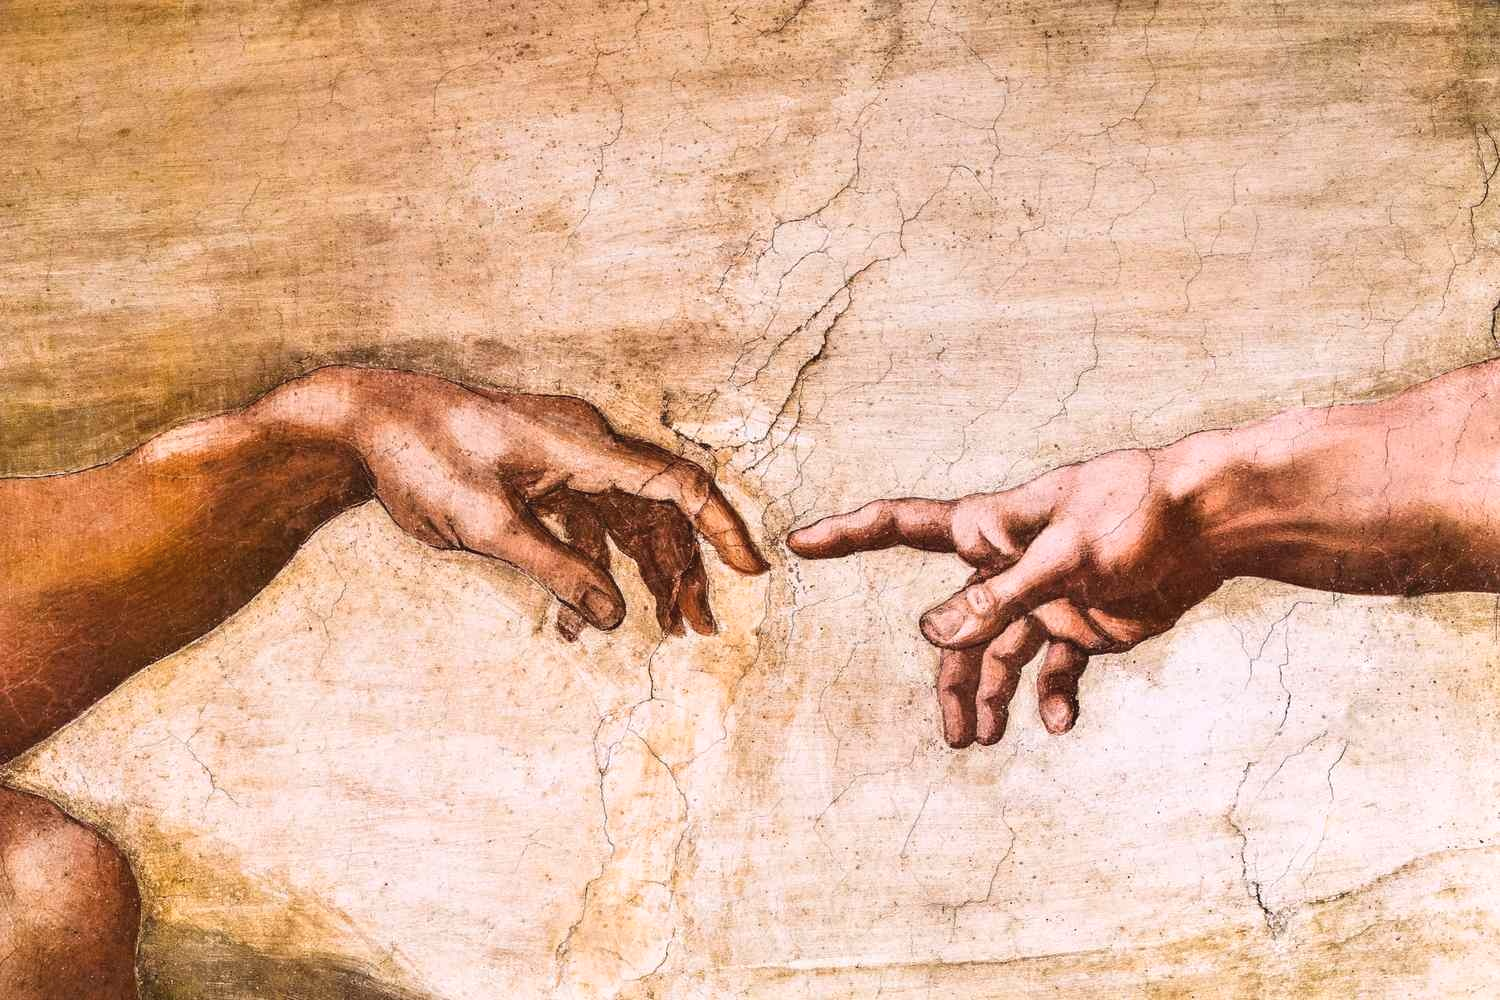

-1

In [ ]:
# Load the steganographed image
img_steg = cv2.imread('steg_image.jpg')

# Adjust brightness and contrast
alpha = 1  # contrast control (1.0-3.0)
beta = 10    # brightness control (0-100)
adjusted = cv2.convertScaleAbs(img_steg, alpha=alpha, beta=beta)
from google.colab import files

files.download('steg_image.jpg')


cv2_imshow(adjusted)
cv2.waitKey(0)

In [ ]:
# Extract message from stego image
bin_message = ""
for i in np.ndindex(cD.shape):
    if len(bin_message) < len(message) * 8:
        bin_message += format(int(cD[i]), '08b')[-1]

# Convert binary message to ASCII string
extracted_message = ""
for i in range(0, len(bin_message), 8):
    extracted_message += chr(int(bin_message[i:i+8], 2))

print("Extracted message:", extracted_message)

Extracted message: This is a secret message


In [ ]:
import os
cwd = os.getcwd()
print(cwd)
from google.colab import files

files.download('stego_image.png')


/content


FileNotFoundError: ignored